In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_excel(r"C:\Users\boyu571\R\highdim.xlsx")

# List of countries to analyze
countries = ["Australia", "Canada", "France", "Japan", "United States"]

# Prepare a dictionary to store the Ridge coefficients for each country
ridge_coefficients = {}

# Loop over each country
for country in countries:
    # Filter data for the current country
    country_data = data[data["country"] == country].copy()
    
    # Separate features (X) and target variable (y)
    X = country_data.drop(["country3letters", "time0", "country", "gdpgrowth"], axis=1)
    y = country_data["gdpgrowth"]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train a Ridge regression model
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_scaled, y)
    
    # Store the coefficients
    ridge_coefficients[country] = pd.Series(ridge.coef_, index=X.columns)

ridge_coefficients["Australia"]  # Displaying coefficients for Australia as an example


Gross domestic product - expenditure approach_Growth rate based on seasonally adjusted volume data,  percentage change on the same quarter of the previous year   -0.070041
Private final consumption expenditure_National currency, current prices, annual levels, seasonally adjusted                                                        0.067204
Private final consumption expenditure_US dollars, current prices, current PPPs, annual levels, seasonally adjusted                                                 0.088712
Private final consumption expenditure_Growth rate based on seasonally adjusted volume data, percentage change on the previous quarter                              0.097322
Private final consumption expenditure_Growth rate based on seasonally adjusted volume data,  percentage change on the same quarter of the previous year           -0.116171
                                                                                                                                            

In [6]:
ridge_coefficients["United States"].to_csv("ridge_USA.csv")

In [7]:
# Extracting and presenting the Ridge coefficients for the other countries

ridge_coefficients_df = pd.DataFrame(ridge_coefficients)
ridge_coefficients_df.head()  # Displaying the first few rows for all countries for brevity


,Australia,Canada,France,Japan,United States
"Gross domestic product - expenditure approach_Growth rate based on seasonally adjusted volume data, percentage change on the same quarter of the previous year",-0.070041,0.074669,-0.026895,-0.017204,0.035000
"Private final consumption expenditure_National currency, current prices, annual levels, seasonally adjusted",0.067204,0.056850,0.001608,-0.221272,0.045777
"Private final consumption expenditure_US dollars, current prices, current PPPs, annual levels, seasonally adjusted",0.088712,0.066532,0.009751,-0.049898,0.045777
"Private final consumption expenditure_Growth rate based on seasonally adjusted volume data, percentage change on the previous quarter",0.097322,-0.022060,-0.058659,0.170221,0.060512
"Private final consumption expenditure_Growth rate based on seasonally adjusted volume data, percentage change on the same quarter of the previous year",-0.116171,0.031905,-0.081044,0.006463,-0.044989


In [8]:
ridge_coefficients_df.to_csv("ridge_country.csv")

In [10]:
from sklearn.linear_model import Lasso

# Prepare dictionaries to store the LASSO coefficients and selected variables for each country
lasso_coefficients = {}
lasso_selected_vars = {}

# Loop over each country
for country in countries:
    # Filter data for the current country
    country_data = data[data["country"] == country].copy()
    
    # Separate features (X) and target variable (y)
    X = country_data.drop(["country3letters", "time0", "country", "gdpgrowth"], axis=1)
    y = country_data["gdpgrowth"]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train a LASSO regression model
    # We use a small alpha value to ensure that some coefficients are set to zero
    lasso = Lasso(alpha=0.01, max_iter=10000)
    lasso.fit(X_scaled, y)
    
    # Extract the coefficients and selected variables
    coefficients = pd.Series(lasso.coef_, index=X.columns)
    selected_vars = coefficients[coefficients != 0].index.tolist()
    
    # Store the coefficients and selected variables
    lasso_coefficients[country] = coefficients
    lasso_selected_vars[country] = selected_vars

lasso_selected_vars  # Displaying selected variables for each country


{'Australia': ['Imports of goods and services_Growth rate based on seasonally adjusted volume data, percentage change on the previous quarter',
  'add. Purchasing power parity of GDP_National currency per US Dollar',
  'Residual item_National currency, volume estimates, OECD reference year, annual levels, seasonally adjusted',
  'IT 1*4',
  'IT 1*15',
  'IT 4*5',
  'IT 4*10',
  'IT 4*11',
  'IT 4*28',
  'IT 4*29',
  'IT 5*11',
  'IT 5*22',
  'IT 5*28',
  'IT 5*32',
  'IT 9*22',
  'IT 10*14',
  'IT 10*16',
  'IT 10*22',
  'IT 10*23',
  'IT 10*28',
  'IT 10*29',
  'IT 11*16',
  'IT 11*23',
  'IT 11*28',
  'IT 11*29',
  'IT 11*30',
  'IT 16*17',
  'IT 16*22',
  'IT 16*23',
  'IT 16*28',
  'IT 16*29',
  'IT 16*30',
  'IT 16*31',
  'IT 17*22',
  'IT 17*23',
  'IT 17*28',
  'IT 17*29',
  'IT 20*28',
  'IT 21*24',
  'IT 21*25',
  'IT 22*23',
  'IT 22*28',
  'IT 22*29',
  'IT 23*28',
  'IT 29*32'],
 'Canada': ['Gross domestic product - expenditure approach_Growth rate based on seasonally adjus

In [15]:
lasso_selected_vars["Australia"]

['Imports of goods and services_Growth rate based on seasonally adjusted volume data, percentage change on the previous quarter',
 'add. Purchasing power parity of GDP_National currency per US Dollar',
 'Residual item_National currency, volume estimates, OECD reference year, annual levels, seasonally adjusted',
 'IT 1*4',
 'IT 1*15',
 'IT 4*5',
 'IT 4*10',
 'IT 4*11',
 'IT 4*28',
 'IT 4*29',
 'IT 5*11',
 'IT 5*22',
 'IT 5*28',
 'IT 5*32',
 'IT 9*22',
 'IT 10*14',
 'IT 10*16',
 'IT 10*22',
 'IT 10*23',
 'IT 10*28',
 'IT 10*29',
 'IT 11*16',
 'IT 11*23',
 'IT 11*28',
 'IT 11*29',
 'IT 11*30',
 'IT 16*17',
 'IT 16*22',
 'IT 16*23',
 'IT 16*28',
 'IT 16*29',
 'IT 16*30',
 'IT 16*31',
 'IT 17*22',
 'IT 17*23',
 'IT 17*28',
 'IT 17*29',
 'IT 20*28',
 'IT 21*24',
 'IT 21*25',
 'IT 22*23',
 'IT 22*28',
 'IT 22*29',
 'IT 23*28',
 'IT 29*32']

In [17]:
# Displaying the LASSO coefficients for each country
lasso_coefficients_df = pd.DataFrame(lasso_coefficients)
lasso_coefficients_df.to_csv("lasso_country.csv")


In [18]:
# Importing the necessary module for OLS regression
import statsmodels.api as sm

# Prepare dictionaries to store the post-LASSO OLS coefficients for each country
post_lasso_coefficients = {}

# Loop over each country
for country in countries:
    # Filter data for the current country
    country_data = data[data["country"] == country].copy()
    
    # Separate features (X) and target variable (y) using only the variables selected by the LASSO regression
    X = country_data[lasso_selected_vars[country]]
    y = country_data["gdpgrowth"]
    
    # Add a constant to the features (for the intercept term)
    X = sm.add_constant(X)
    
    # Train an OLS regression model
    ols = sm.OLS(y, X).fit()
    
    # Store the coefficients (excluding the intercept)
    post_lasso_coefficients[country] = ols.params.drop("const")

post_lasso_coefficients_df = pd.DataFrame(post_lasso_coefficients)
post_lasso_coefficients_df  # Displaying the post-LASSO OLS coefficients for each country


,Australia,Canada,France,Japan,United States
"General government final consumption expenditure_Growth rate based on seasonally adjusted volume data, percentage change on the same quarter of the previous year",NaN,NaN,NaN,NaN,-0.108539
"General government final consumption expenditure_Growth rate based on seasonally adjusted volume data, percentage change on the previous quarter",NaN,NaN,NaN,NaN,0.187733
"Gross domestic product - expenditure approach_Growth rate based on seasonally adjusted volume data, percentage change on the same quarter of the previous year",NaN,0.119155,NaN,NaN,NaN
"Gross fixed capital formation_Growth rate based on seasonally adjusted volume data, percentage change on the same quarter of the previous year",NaN,NaN,NaN,NaN,-0.003754
IT 1*11,NaN,0.029452,NaN,1.907862e-05,NaN
...,...,...,...,...,...
"Imports of goods and services_US dollars, current prices, current PPPs, annual levels, seasonally adjusted",NaN,0.000001,NaN,NaN,NaN
"Private final consumption expenditure_Growth rate based on seasonally adjusted volume data, percentage change on the previous quarter",NaN,0.135322,NaN,-1.876073e-06,NaN
"Private final consumption expenditure_National currency, current prices, annual levels, seasonally adjusted",NaN,NaN,NaN,-1.156372e-08,NaN
"Residual item_National currency, volume estimates, OECD reference year, annual levels, seasonally adjusted",-0.000013,-0.000017,-0.000003,-2.010313e-07,-0.000004


In [19]:
post_lasso_coefficients_df.to_csv("post_lasso_country.csv")

In [20]:
# Comparing the post-LASSO OLS coefficients with the LASSO coefficients for the selected variables
comparison_df = pd.concat([lasso_coefficients_df, post_lasso_coefficients_df], 
                          keys=['LASSO', 'Post-LASSO'], axis=1)

# Filter rows to only include selected variables (those with non-zero LASSO coefficients)
comparison_df = comparison_df.dropna(how='all', subset=pd.MultiIndex.from_tuples([('LASSO', country) for country in countries]))

comparison_df


LASSO                   \
                                                   Australia    Canada France   
Gross domestic product - expenditure approach_G... -0.000000  0.111613    0.0   
Private final consumption expenditure_National ... -0.000000  0.000000    0.0   
Private final consumption expenditure_US dollar... -0.000000  0.000000    0.0   
Private final consumption expenditure_Growth ra... -0.000000  0.085934   -0.0   
Private final consumption expenditure_Growth ra... -0.000000  0.000000   -0.0   
...                                                      ...       ...    ...   
IT 29*31                                            0.000000 -0.000000   -0.0   
IT 29*32                                            0.041776 -0.000000    0.0   
IT 30*31                                           -0.000000  0.000000   -0.0   
IT 30*32                                           -0.000000  0.000000    0.0   
IT 31*32                                           -0.000000  0.000000    0.0   

                                                                            \
                                                       Japan United States   
Gross domestic product - expenditure approach_G... -0.000000           0.0   
Private final consumption expenditure_National ... -0.492404          -0.0   
Private final consumption expenditure_US dollar...  0.000000          -0.0   
Private final consumption expenditure_Growth ra...  0.167184           0.0   
Private final consumption expenditure_Growth ra...  0.000000           0.0   
...                                                      ...           ...   
IT 29*31                                           -0.000000           0.0   
IT 29*32                                            0.114626           0.0   
IT 30*31                                            0.000000          -0.0   
IT 30*32                                            0.358511           0.0   
IT 31*32                                            0.000008           0.0   

                                                   Post-LASSO            \
                                                    Australia    Canada   
Gross domestic product - expenditure approach_G...        NaN  0.119155   
Private final consumption expenditure_National ...        NaN       NaN   
Private final consumption expenditure_US dollar...        NaN       NaN   
Private final consumption expenditure_Growth ra...        NaN  0.135322   
Private final consumption expenditure_Growth ra...        NaN       NaN   
...                                                       ...       ...   
IT 29*31                                                  NaN       NaN   
IT 29*32                                            -0.006057       NaN   
IT 30*31                                                  NaN       NaN   
IT 30*32                                                  NaN       NaN   
IT 31*32                                                  NaN       NaN   

                                                                         \
                                                   France         Japan   
Gross domestic product - expenditure approach_G...    NaN           NaN   
Private final consumption expenditure_National ...    NaN -1.156372e-08   
Private final consumption expenditure_US dollar...    NaN           NaN   
Private final consumption expenditure_Growth ra...    NaN -1.876073e-06   
Private final consumption expenditure_Growth ra...    NaN           NaN   
...                                                   ...           ...   
IT 29*31                                              NaN           NaN   
IT 29*32                                              NaN  3.590126e-04   
IT 30*31                                              NaN           NaN   
IT 30*32                                              NaN  8.175269e-10   
IT 31*32                                              NaN  3.473217e-08   

                                  

In [21]:
# Load the data
gdp_growth = pd.read_csv(r"C:\Users\boyu571\R\gdpgrowth.csv")

# Display the first few rows
gdp_growth.head()

,TIME,ARG,AUS,AUT,BEL,BGR,CAN,CHE,CRI,DEU,...,NOR,NZL,POL,PRT,ROU,SVK,SVN,SWE,USA,ZAF
0,1995-Q2,-3.790304,0.402790,0.424044,0.420617,11.780249,0.040378,0.179285,-0.639215,0.732410,...,0.877009,1.277020,1.879648,1.179121,0.470742,1.666927,0.247902,0.474959,0.298306,0.287484
1,1995-Q3,-0.386300,2.255020,0.226813,0.599566,0.495019,0.131785,0.502913,-0.000248,0.168784,...,2.368343,0.922623,2.793463,0.433833,2.279218,0.576424,0.197735,0.360183,0.850665,0.663463
2,1995-Q4,0.766785,-0.023540,0.344772,0.206091,8.859343,0.409813,-0.090385,0.423824,0.051847,...,1.239709,0.670405,1.280270,0.677522,-0.991328,1.906391,0.230187,1.111244,0.679037,0.336367
3,1996-Q1,2.749660,1.641965,0.770485,-0.201498,1.132525,0.068806,0.414542,-0.002786,-0.816171,...,1.456645,1.404528,2.086182,0.789901,1.369930,1.691678,0.646354,0.665640,0.748971,1.852498
4,1996-Q2,2.228766,0.686816,0.749585,0.701793,-1.120462,0.696293,-0.360167,-0.070955,1.345353,...,-0.137805,0.889552,2.002887,1.199492,1.902030,1.175673,1.178967,-0.782324,1.667884,1.191359


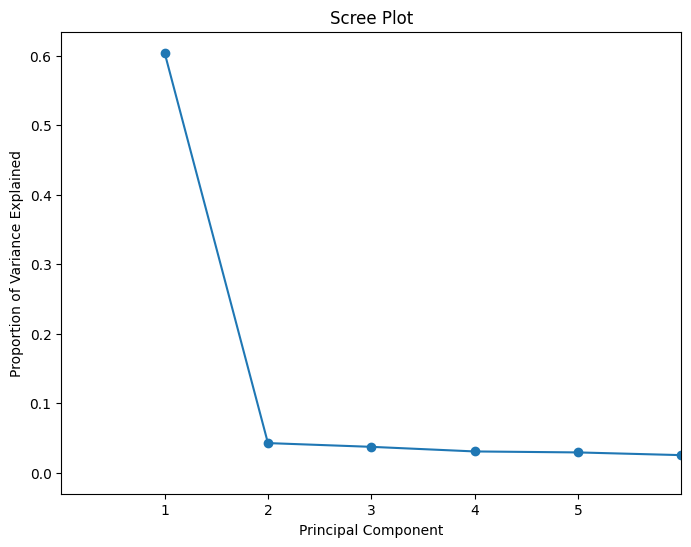

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Drop the 'TIME' column
gdp_growth_numeric = gdp_growth.drop(columns='TIME')

# Standardize the data
scaler = StandardScaler()
gdp_growth_scaled = scaler.fit_transform(gdp_growth_numeric)

# Create a PCA object
pca = PCA()

# Fit the PCA model to the data
pca.fit(gdp_growth_scaled)

# Get the explained variance ratio of the components
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.xlim(0, 6)  # We are only interested in the first five components
plt.xticks(np.arange(1, 6))
plt.show()
